# Chapter 2: Fifths as Audible and Visible Order

***

#### Treating the **circle of fifths as the standard for analysis** yields very clear results for analysis and categorization of musical sounds.

#### Stated more boldly: harmony turns a computer into a meaningfully ternary device.

## 1) Changing Key as Bit Shift

In the circle of fifths organization, changing key takes on a different aspect -- rather more organized. It is simply a bit shift.

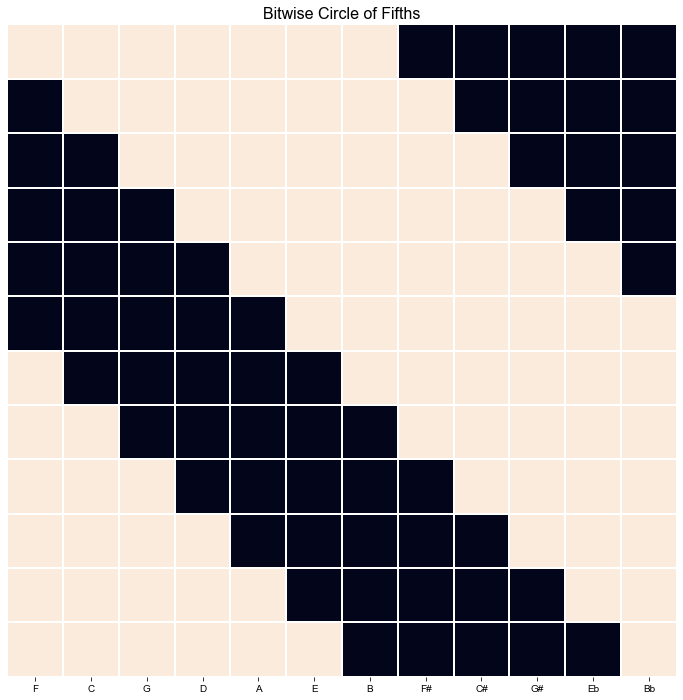

In [1]:
import numpy as np
import IPython.display as ipd

import jupyter_pt_tools as jpt_pt
import pt_utils
import pt_musicutils
import pt_keypattern
import pt_naming_conventions

circle_of_fifths = np.array([pt_utils.rotate_bits_right(0b111111100000, i) for i in range(12)])
jpt_pt.multiple_notegroup_heatmap(circle_of_fifths, title="Bitwise Circle of Fifths")

kpdve_modulation = [[i, 0, 1, 0, 0] for i in range(12)]
patterns = [mode + disp for mode, disp in [pt_musicutils.get_tonic_mode_disp_tuple(kpdve) for kpdve in kpdve_modulation]]
sequence = jpt_pt.link_ordered_wavestep_sequences(patterns, duration=10)
ipd.Audio(sequence, rate=4000)

# 2) Latent Harmony in Audio

Another interesting side effect is that a tone, acknowledged within a tonality, registers its own disturbances -- primarily caused by its own feedback in the third harmonic, a fifth above. 

Here is a chromatic analysis of a single tone (C) played on a violin.  Its complex resonances fall largely within the C and the G above it.

There are too many systems and too many patterns to count, but the number 3 is ever-present.

In [2]:
import librosa
import librosa.display

import matplotlib.pyplot as plt

filename = "../audio/violin_c.mp3"
y, sr = librosa.load(filename)
chroma_a = librosa.feature.chroma_cens(y=y, sr=sr)

/Users/timsummers/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


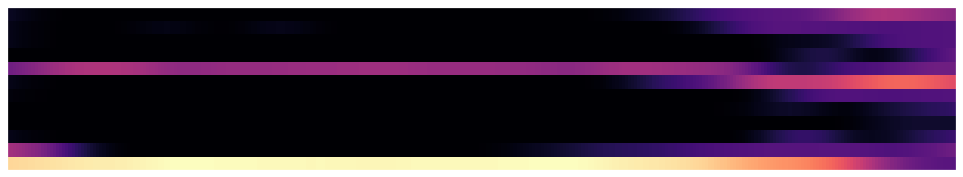

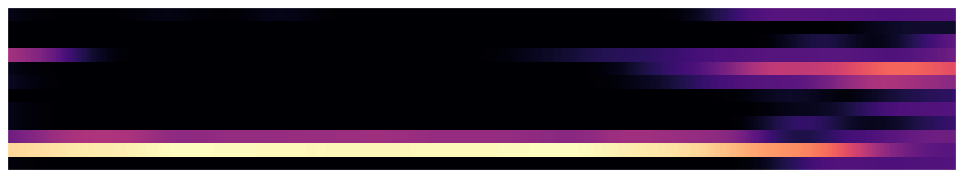

In [3]:
plt.figure(figsize=(17, 3))
librosa.display.specshow(chroma_a)
plt.figure(figsize=(17, 3))
librosa.display.specshow(jpt_pt.switch_chroma(chroma_a))
ipd.Audio(filename)

A basic audio analysis of this audio signal (from harmonypartition) shows it to be consistently in C Major (red), reaching toward G (the orange strip above).

/Users/timsummers/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


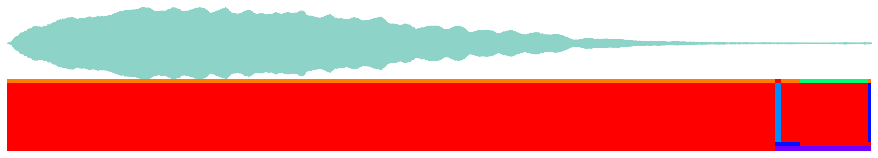

In [12]:
import pt_analyzeaudio
pt_analyzeaudio.graph_audio_file(filename, chroma_threshold=0.5, key_orientation=np.array([0,0,1,4,2]))

***

# Resolving Entropy and Designing harmonic patterns.

Working from the idea that key changes are mere bit shifts, we can play a few games with simple patterns. They yield results.

The last steps on this page are merely suggestive, but that is often a fruitful condition. Music will often multiply itself quickly, given a simple backbone of patterns and systems. This is not a theory: just a potential tool or starting point

Consider the resolution of a tritone, as the reduction from a 7-tone to a 5-tone space. 

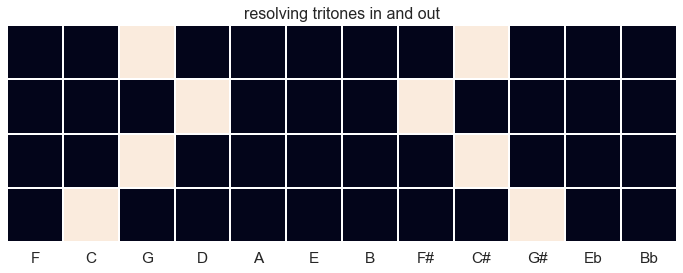

In [14]:
tritone = 0b1000001000
third = 0b0100010000
sixth = 0b010000000100

sequence = [tritone, third, tritone, sixth]

jpt_pt.multiple_notegroup_heatmap(sequence, title="resolving tritones in and out")

resolution = jpt_pt.link_wavepile_sequences(sequence)
ipd.Audio(resolution, rate=4000)

It looks like resolution. It sounds like a resolution. Maybe it is, somehow.

And some very simple patterns are just nice. There is a **lot** of room for fooling.

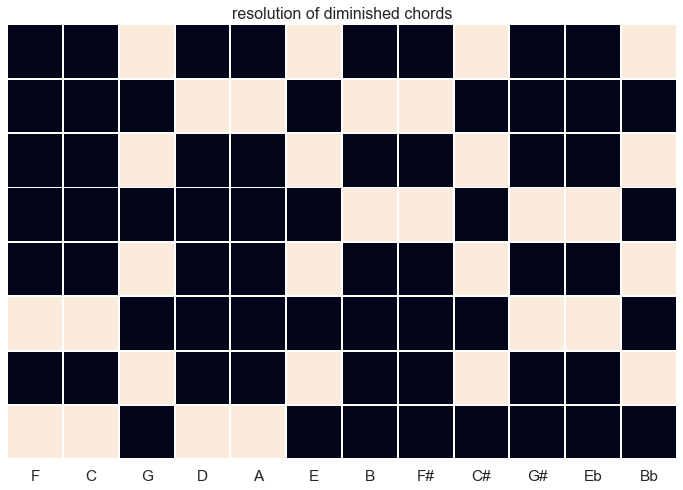

In [16]:
tritone = 0b1001001001
third = 0b0110110000
third2 = pt_utils.rotate_bits_right(third, 3)
third3 = pt_utils.rotate_bits_right(third, 6)
third4 = pt_utils.rotate_bits_right(third, 9)

sequence = [tritone, third, tritone, third2, tritone, third3, tritone, third4]

jpt_pt.multiple_notegroup_heatmap(sequence, title="resolution of diminished chords")

resolution = jpt_pt.link_wavepile_sequences(sequence, duration=4)
ipd.Audio(resolution, rate=4000)

Until you remember that each of these heatmaps represents a **only 12 bits of memory**. And can be used to analyze audio.

Then, it would seem, there is a **whole lot** of room for fooling.

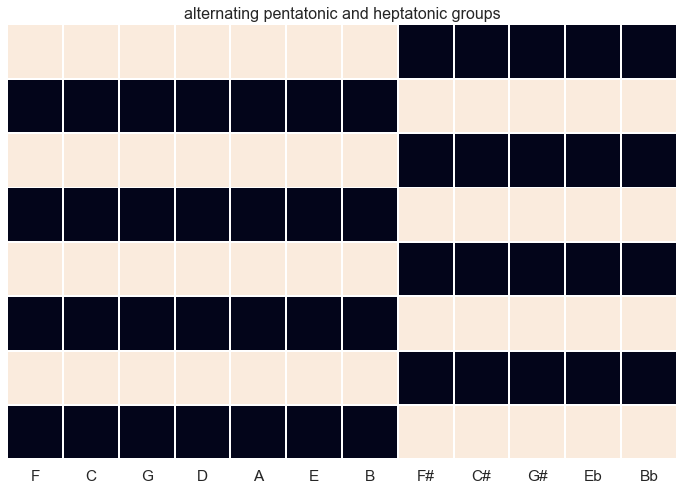

In [27]:
c = 0b111111100000
fs = 0b11111

sequence = [c, fs, c, fs,c, fs,c, fs]

jpt_pt.multiple_notegroup_heatmap(sequence, title="alternating pentatonic and heptatonic groups")

resolution = jpt_pt.link_wavepile_sequences(sequence, duration=10)
ipd.Audio("hept_pent.wav", rate=4000)